# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 3

Do wykonania laboratorium należy skorzystać z bibliotek:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Zadanie 1 - zakupy

W sklepie dostępne są następujące produkty:

| Produkt | Cena (netto) | Podatek |
| --- | --- | --- |
| Chleb | 3 | 5% |
| Butelka wody (1l) | 2 | 8% |
| Pomidor 1szt. | 2 | 5% |
| Olej (1l) | 6 | 5% |
| Szafran | 1.5 | 8% |
| Krewetki (opakowanie) | 20 | 23% |
| Lód (opakowanie) | 5 | 23% |


#### Zadanie 1 A

- Zapisz nazwy produktów w tablicy `N`.
- Zapisz ceny produktów w tablicy `C`.
- Zapisz podatek w tablicy `P`.

*(tablicy jedno wymiarowej czyli wektorze)*



In [2]:
import numpy as np
N = np.array(['Chleb', 'Butelka wody', 'Pomidor', 'Olej', 'Szafran', 'Krewetki', 'Lód'])
C = np.array([3, 2, 2, 6, 1.5, 20, 5])
P = np.array([.05, .08, .05, .05, 0.08, 0.23, 0.23])

#### Zadanie 1 B

Klient kupił:

- 2 szt. chleba, 
- 6 butelek wody,
- 1 opakowanie krewetek.

Zapisz zakupy klienta w wektorze `Z` (zachowaj wymiarowość).

In [3]:
Z  = np.array([2, 6, 0, 0, 0, 1, 0])


#### Zadanie 1C

Oblicz sumę **netto** jaką klient musi zapłacić bez używania:
- operatora `+`, 
- funkcji/metody `sum`
- operatego mnożenia skalarnego (`*`, `__mul__`).

_Podpowiedź: jeden z wektorów trzeba transponować_

In [4]:
Z.T@C

38.0

#### Zadanie 1D

Oblicz wartość **brutto** jaką klient musi zapłacić w sklepie. W tym zadaniu możesz użyć operatora `*`.

Dodatkowo, wyświetl rachunek w postaci tabeli zawierającą kolumny: 
- nazwa produktu,
- cena netto, 
- liczba sztuk, 
- cena netto danej pozycji (cena netto x liczba sztuk), 
- podatek (procentowo np. `5%`),
- cena brutto danej pozycji. 

Na końcu tabeli ma się wyświetlić suma brutto do zapłaty.

In [5]:
all_products = np.rec.fromarrays([N, C, Z, Z*C, P, Z*C*(1+P)], names=['name', 'price_netto', 'count', 'position_netto', 'tax', 'position_price'])
selected_products = all_products[all_products['count'] > 0]

print(f'{"nazwa produktu":15}| {"cena netto":10}| {"liczba sztuk":>15}| {"cena netto pozycji":>20}| {"podatek":>11}| {"cena brutto pozycji":>20}|')
print('-'*102)
for product in selected_products:
    name, price_netto, count, position_netto, tax, position_price = product
    print(f'{name:15}| {price_netto:10.2f}| {count:15d}| {position_netto:20.2f}| {tax*100:10}%| {position_price:>20.2f}|')
print('-'*102)
print('Razem:', round(sum(selected_products['position_price']), 2))

nazwa produktu | cena netto|    liczba sztuk|   cena netto pozycji|     podatek|  cena brutto pozycji|
------------------------------------------------------------------------------------------------------
Chleb          |       3.00|               2|                 6.00|        5.0%|                 6.30|
Butelka wody   |       2.00|               6|                12.00|        8.0%|                12.96|
Krewetki       |      20.00|               1|                20.00|       23.0%|                24.60|
------------------------------------------------------------------------------------------------------
Razem: 43.86


### Zadanie 2

Zmodyfikuj kod z zadania pierwszego w ten sposób, że dane o produktach będą wczytywane z pliku `produkty.csv` a dane do rachunku (liczba zakupionych produktów) z pliku `rachunek.csv`.

Utwórz przykładowe dane (inne niż w zadaniu 1).

In [246]:
import numpy.lib.recfunctions as rfn

# Load csv
products = np.genfromtxt('produkty.csv', delimiter=',', dtype=None, encoding='utf-8')
products = rfn.rename_fields(products, {'f0': 'name', 'f1': 'price', 'f2': 'tax'})

bill = np.genfromtxt('rachunek.csv', delimiter=',', dtype=None, encoding='utf-8')
bill = rfn.rename_fields(bill, {'f0': 'name', 'f1': 'count'})

# Initiating variables
N = products['name']
C = products['price']
P = products['tax']

Z = np.zeros_like(P, dtype=np.int_)
for bill_pos in bill:
    name, count = bill_pos
    index = np.where(products['name'] == name)
    Z[index] += count

# Copied from previous task
all_products = np.rec.fromarrays([N, C, Z, Z*C, P, Z*C*(1+P)], names=['name', 'price_netto', 'count', 'position_netto', 'tax', 'position_price'])
selected_products = all_products[all_products['count'] > 0]

print(f'{"nazwa produktu":15}| {"cena netto":10}| {"liczba sztuk":>15}| {"cena netto pozycji":>20}| {"podatek":>11}| {"cena brutto pozycji":>20}|')
print('-'*102)
for product in selected_products:
    name, price_netto, count, position_netto, tax, position_price = product
    print(f'{name:15}| {price_netto:10.2f}| {count:15d}| {position_netto:20.2f}| {tax*100:10}%| {position_price:>20.2f}|')
print('-'*102)
print('Razem:', round(sum(selected_products['position_price']), 2))

nazwa produktu | cena netto|    liczba sztuk|   cena netto pozycji|     podatek|  cena brutto pozycji|
------------------------------------------------------------------------------------------------------
baton          |       2.60|               4|                10.40|        5.0%|                10.92|
cola           |       6.20|               1|                 6.20|       23.0%|                 7.63|
popcorn        |       2.50|               2|                 5.00|       20.0%|                 6.00|
------------------------------------------------------------------------------------------------------
Razem: 24.55


### Zadanie 3

#### Zadanie 3 A

Utwórz dwa wektory dwuelementowe `A` i `B` (dowolne wartości dodatnie różne od zera).

Następnie wykonaj sumowanie elementów obu wektorów i zapisz w zmiennej `C`.


In [176]:
A = np.array([5, 4])
B = np.array([2, 4])
C = A+B
print(C)

[7 8]


#### Zadanie 3 B

Wyświetl na wykresie:
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktów `A` oraz `B` (w kolorze <font color='green'>zielonym</font>),
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktu `C` (w kolorze <font color='red'>czerwonym</font>)
- wektor wodzący z punktu `A` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>),
- wektor wodzący z punktu `B` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>).

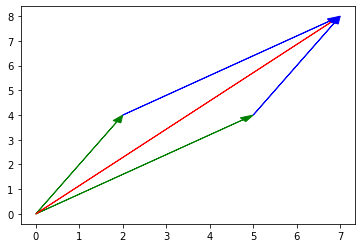

In [187]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

CA = C-A
CB = C-B

ax.arrow(0, 0, A[0], A[1], length_includes_head=True, head_width=0.2, color='green')
ax.arrow(0, 0, B[0], B[1], length_includes_head=True, head_width=0.2, color='green')
ax.arrow(0, 0, C[0], C[1], length_includes_head=True, head_width=0.2, color='red')
ax.arrow(A[0], A[1], CA[0], CA[1], length_includes_head=True, head_width=0.2, color='blue')
ax.arrow(B[0], B[1], CB[0], CB[1], length_includes_head=True, head_width=0.2, color='blue')

### Zadanie 4

Wygeneruj losową macierz 8×8 wg rozkładu Gaussa (średnia: 100, odch. std = 15),
wartości zaokrąglij do liczb całkowitych (int). Macierz ta reprezentuje pewien obraz (w skali szarości).

Następnie zastosuj filtr uśredniający o masce 3×3 dla elementów wewnętrznych (tj. poza brzegiem) tej macierzy i wypisz wynik. W filtrze uśredniającym zastosuj zaokrąglanie w dół do liczby całkowitej.

_Podpowiedź: generacja danych: np.random.normal, np.round._

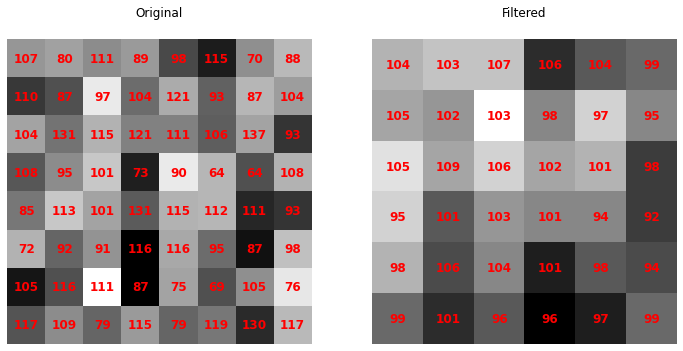

In [251]:
def avg_filter(image):
    w, h = image.shape
    output = np.zeros((w-2, h-2), dtype=image.dtype)
    for i in range(h-2):
        for j in range(w-2):
            output[i][j] = np.floor(np.mean(image[i:i+3, j:j+3]))
    return output

def show_image(image, ax, title):
    ax.matshow(image, cmap='gray');
    ax.axis('off')
    ax.set_title(title)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            ax.text(i, j, int(image[i, j]), ha='center', va='center', c='r', fontsize='large', weight=1000)

image = np.round(np.random.normal(100, 15, (8, 8)))
filtered_image = avg_filter(image)

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
show_image(image, axs[0], title='Original')
show_image(filtered_image, axs[1], title='Filtered')